# Objectives
<br>

*This course used 2 datasets: breast cancer prediction and mpg auto prediction* 

1. Classification and Regression Trees
- Decision tree for classification: use **DecisionTreeClassifier()**
- Classification tree Learning: **IG** 
- Regression Tree 
2. The Bias-Variance Tradeoff
- To achieve **low generalization error**
- Diagnose bias and variance problems
- Ensemble learning
3. Bagging and Random Forests
- Bagging: boostrap aggregation
- Out of Bag Evaluation: **OOB-evaluation**
- Random Forest Evaluation: **RF-evaluation**
4. Boosting
- **AdaBoost**
- **GradientBoostingRegressor**
- **Stochastic Gradient Boosting (SGB)**
5. Model Tuning
- Tuning a CART's Hyperparameters
- Tuning a RF's Hyperparameters

## 1. Classification and Regression Trees
- Decision tree for classification: use DecisionTreeClassifier()
- Classification tree Learning: IG 
- Regression Tree 

### 1.1 Decision tree for classification
- sequence of if-else questions about individual features
- **Objective**: infer class labels
- capture non-linear relationships between features and labels
- do not require feature scaling 
- every node aske one feature and one split-point
 >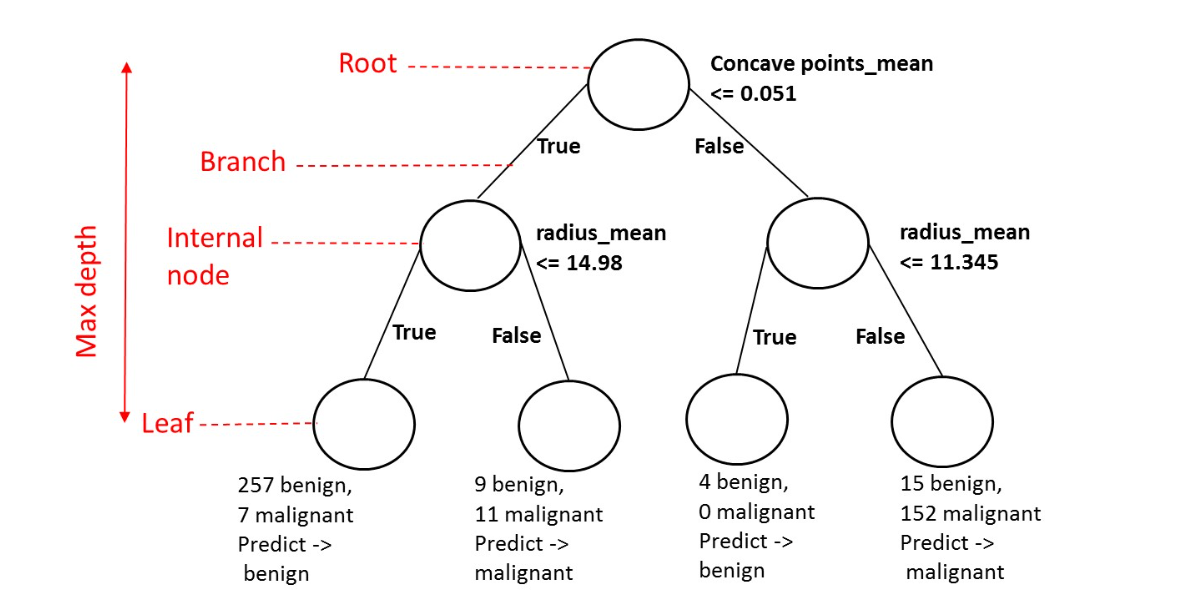
 
- **Decision regions**: region in the feature space whre all instances assigned to one class label
- **Decision boundary**: surface separating different decision regions
> 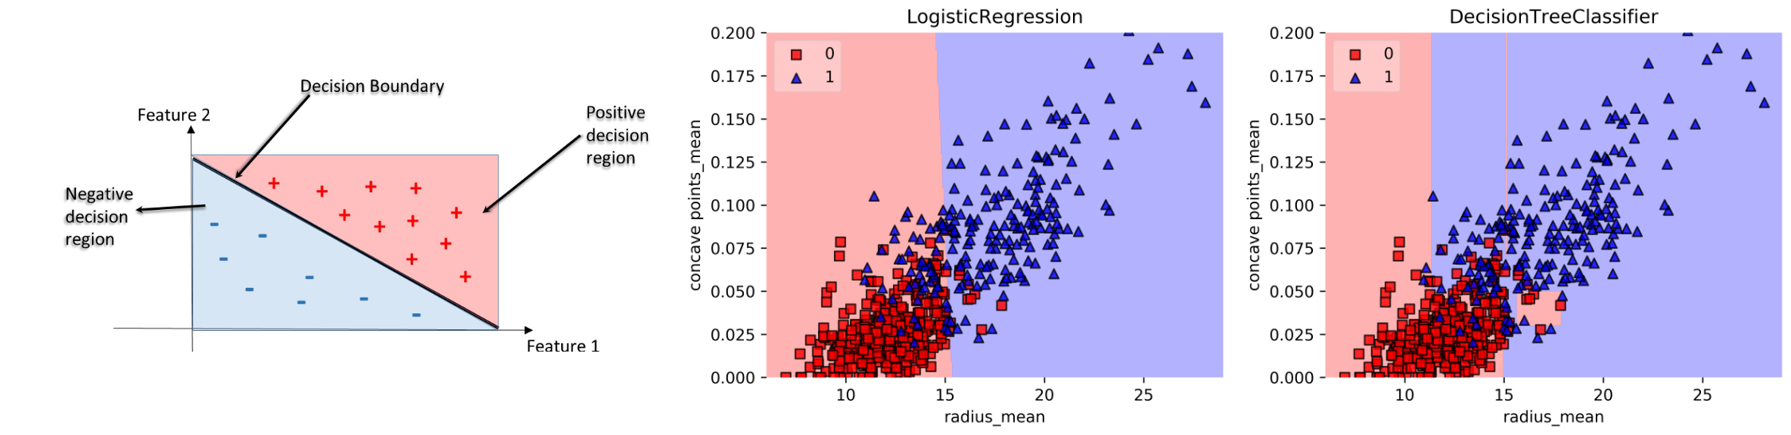

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
breast = pd.read_csv('/QXJ/kaggle/data/breast-cancer.csv')
breast.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [4]:
breast.isna().sum().sort_values()

id                         0
concave points_worst       0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
texture_worst              0
radius_worst               0
fractal_dimension_se       0
symmetry_se                0
concave points_se          0
concavity_se               0
compactness_se             0
smoothness_se              0
area_se                    0
perimeter_se               0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
symmetry_mean              0
concave points_mean        0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
area_mean                  0
perimeter_mean             0
texture_mean               0
radius_mean                0
diagnosis                  0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [38]:
X = breast[['concave points_mean','radius_mean']].to_numpy()
y = breast['diagnosis'].to_numpy()

In [8]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data 
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state = 1)

# Instantiate dt
dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)
# fit the model
dt.fit(X_train, y_train)
# predict the test set labels
y_pred = dt.predict(X_test)
# evaluate the test_set accuracy
accuracy_score(y_test, y_pred)

0.9210526315789473

### 1.2 Classification tree Learning
- Decision tree: data scructure consisting of a hierarchy of nodes
- Node: question or prediction
  - root: no parent node, question giving rise to 2 children nodes
  - internal node: 1 parent node, 2 children nodes 
  - leaf: no parent node, no children node ---> **prediction**
  - in each leaf, one class-label is predominent 
- Information gain(IG): which feature and which split-point to pick? 
  > 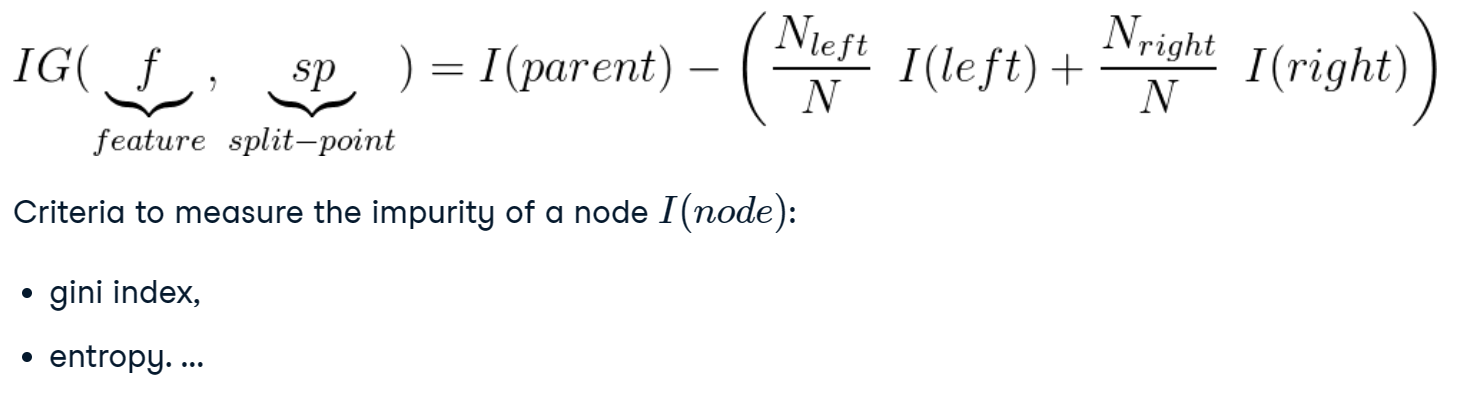
- Classification-Tree learning
   - Nodes ar grown recursively - based on its predecessors
   - At each node, split the data based on: 
     - feature f and split-point sp to maximize IG(node). 
   - if IG(node) = 0, declare the node a leaf
   - *These rules are for unconstrained trees*

In [5]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data 
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state = 1)

# Instantiate dt, set criterion to the gini-index 
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
# fit the model
dt.fit(X_train, y_train)
# predict the test set labels
y_pred = dt.predict(X_test)
# evaluate the test_set accuracy
accuracy_score(y_test, y_pred)

0.8771929824561403

### 1.3 Decision tree for regression
- the regression for not-linearly relationship
 *Must use RMSE (target values is cloeset to the mean value of the labels) to measure the impurity of leaves*
 >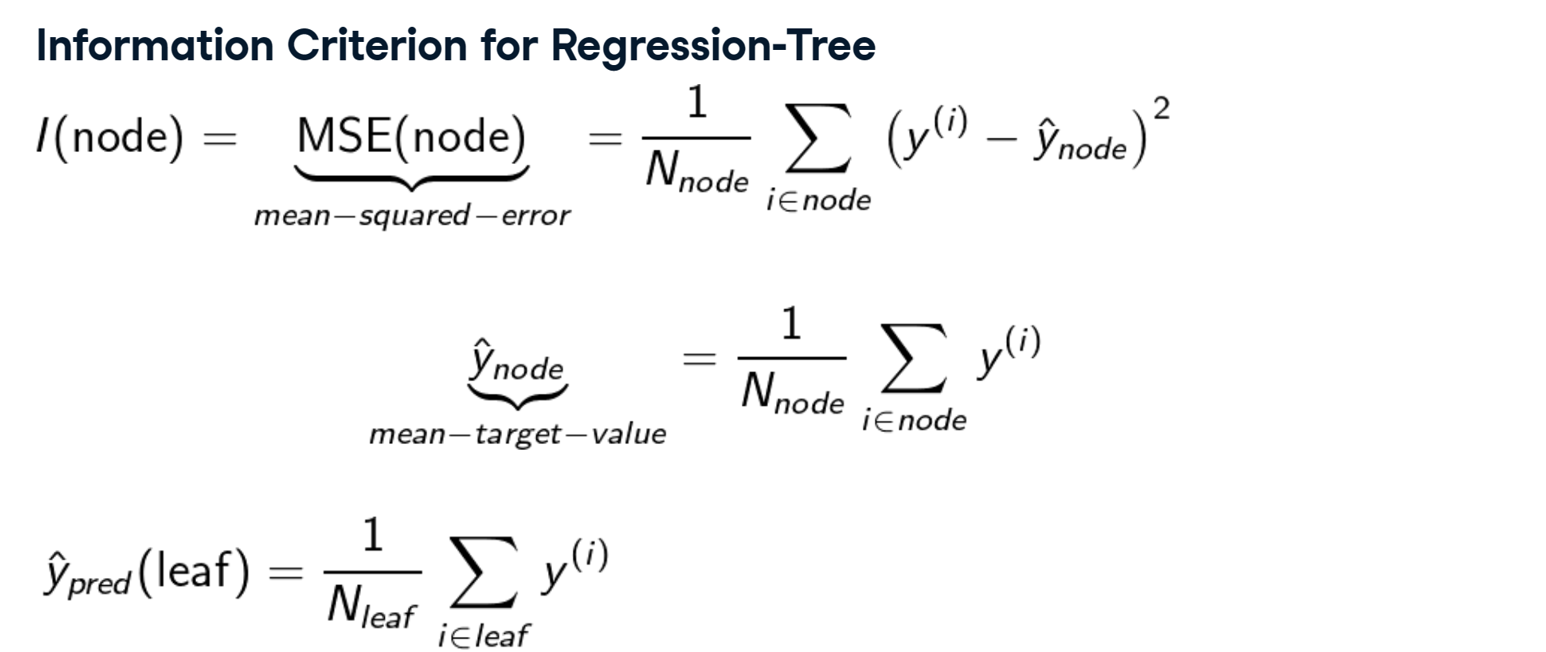
 - Linear regression vs Tree regression 
  *The tree regression can capture better non-linear pattern than linear regression*
  > 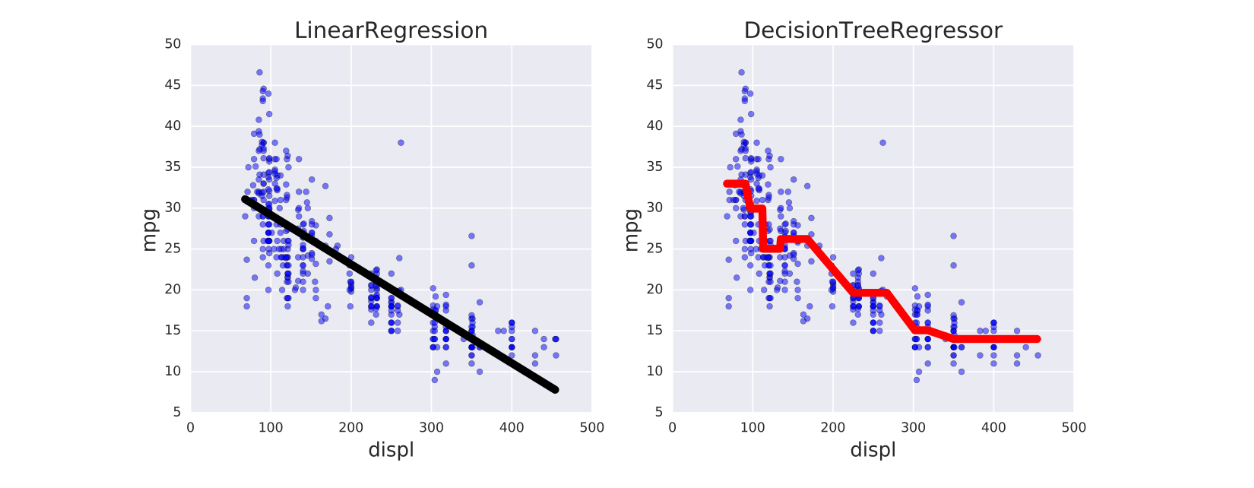

In [6]:
# mpg: miles-per-gallon
mpg = pd.read_csv('/QXJ/kaggle/data/auto-mpg.csv')
mpg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [7]:
mpg.isna().sum().sort_values()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
mpg['origin'].unique()
# 1 is a car made in america, 2 in europe and 3 in asia or other part of the world

array([1, 3, 2], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

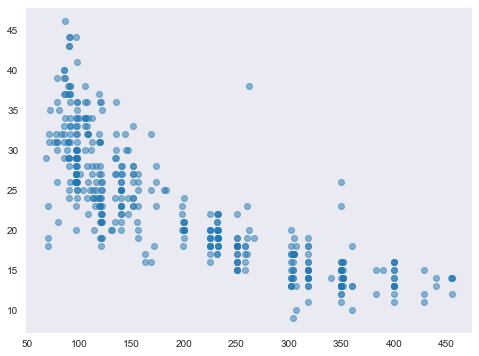

In [31]:
X = mpg['displacement'].to_numpy().reshape(-1,1)
y = mpg['mpg'].to_numpy().astype(int)
sns.set_style('dark')
plt.figure(figsize = (8,6))
plt.scatter(X,y, alpha = 0.5 )
plt.show
# it is not linearly related -> linear regression is not suitable for this 

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# split data 
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state = 1)

# instatiate the decisiontree
# stopping condition: each leaf must has 10% training data
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 0.1, random_state = 1)
# fit the model
dt.fit(X_train, y_train)
# predict
y_pred = dt.predict(X_test)

#evaluate 
mse_dt = MSE(y_test, y_pred)
rmse_dt = np.sqrt(mse_dt)
print(rmse_dt)
# (1) X must be 1D array; (2) y must be int

4.009364039345891


## 2. The Bias-Variance Tradeoff
- To achieve **low generalization error**
- Diagnose bias and variance problems
- Ensemble learning

### 2.1 Generalization error: find the model comlexity to achieve the lowest generalization error
- Supervied learning: mapping y=f(x) - f is unknown
  > 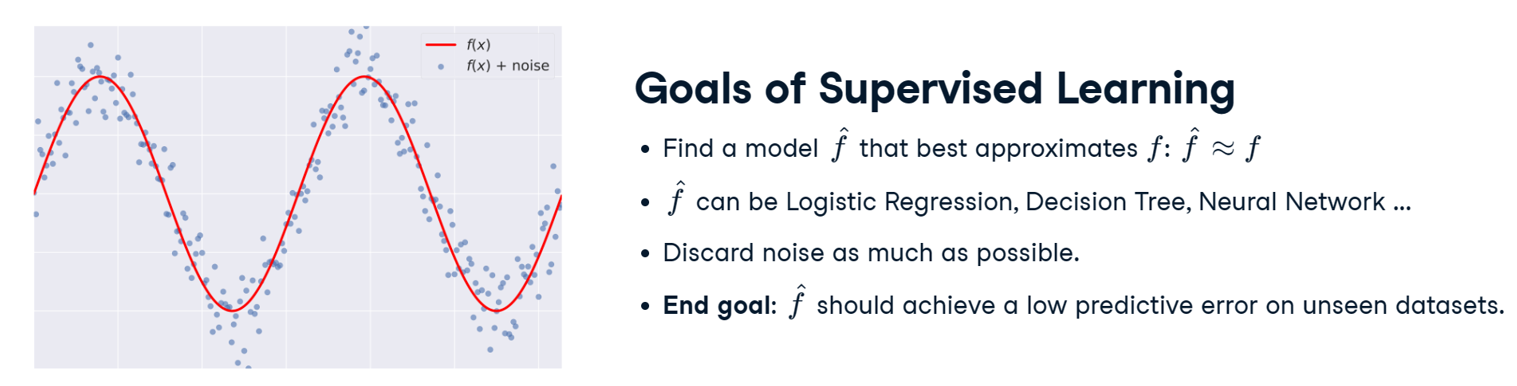
- Difficultise in approximating f: 
  - overfitting: fits the training set noise
  - underfitting: not flexible enough to approximate f
  > 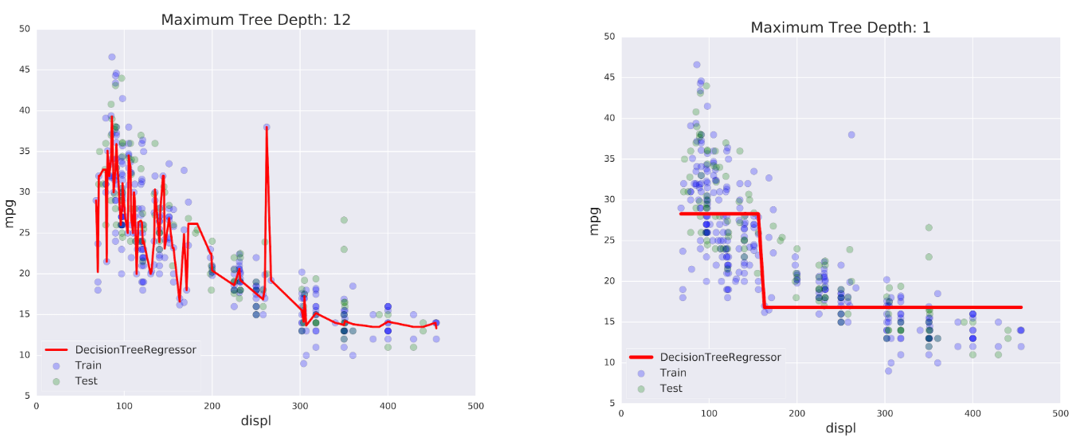
- Generalization error of f_hat: Does f_hat generalize well on unseen data? 
 - **bias **2 + variance + irreducible**
 - bias: on average how much f_hat <> f
 - variance: how much f_hat is inconsistent over different training data
 - irreducible error: the distribution of noise
 > 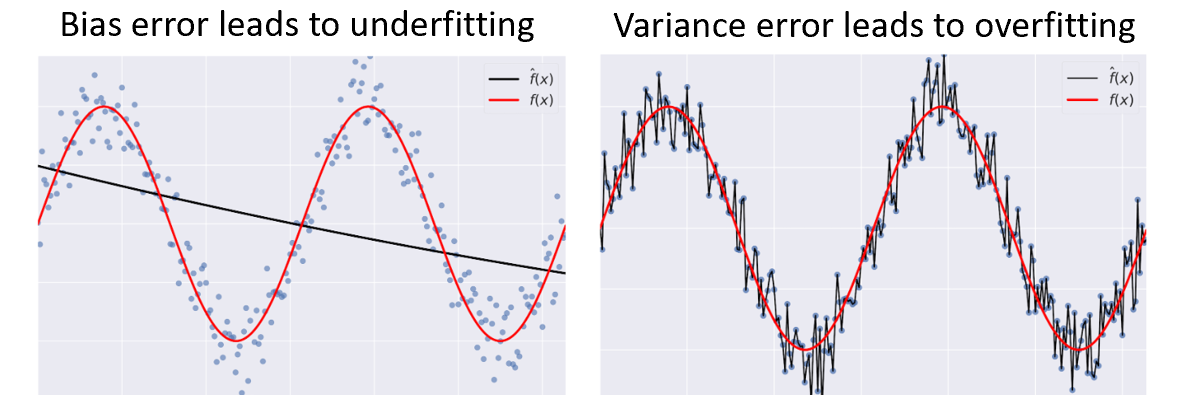
- Model complexity: sets the flexibility of f_hat 
 - maximize tree depth 
 - minimize samples per leaf
 > 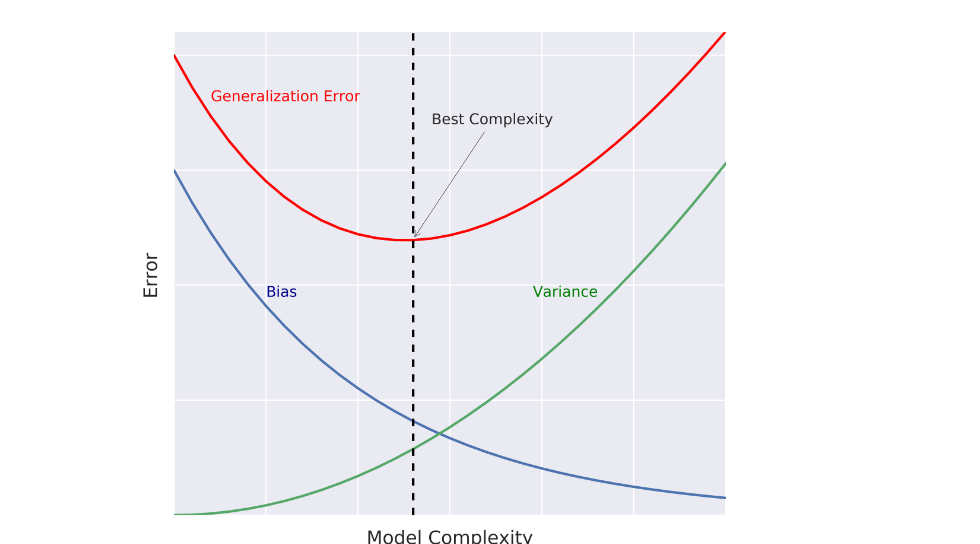
   *bias-variance trade-off*

### 2.2 Diagnose bias and variance problems
- Split the data into training and test: test set for evaluation
- Cross-Validation(CV): obtain reliabe estimate of f_hat's performance on training set 
  - K-Fold CV: obtain mean of the CV error
  - Hold-Out CV
- if f_hat suffers from **high variance**: CV error of f_hat > training set error of f_hat -> *f_hat overfits the training set*  
  - decrease model complexity
  - for ex: decrease max depth, increase min samples per leaf ...
  - gather more data...
- if f_hat suffers from **high bias**: CV error of f_hat = training set error of f_hat >> desired error -> *f_hat underfits the training set*
  - increase model complexity
  - for ex: increase max depth, decrease min samples per leaf ...
  - gather more relevant features...

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

# split data 
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state = seed)

# instatiate the decisiontree
# stopping condition: each leaf must has 14% training data
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 0.14, random_state = seed)

# evaluate the list of MSE ontained by 10-fold CV
# set n_jobs to -1 to exploit all CPU cores in computation
MSE_CV = - cross_val_score(dt, X_train, y_train, cv = 10,
                          scoring = 'neg_mean_squared_error',
                          n_jobs = -1)
MSE_CV

C:\Users\QXJ\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


array([21.625     , 10.84375   , 21.        , 20.8125    , 27.125     ,
       23.78125   ,  9.78125   , 30.25      , 19.41935484, 17.70967742])

In [34]:
# fit the model
dt.fit(X_train, y_train)
# predict the labels of training set
y_pred_train = dt.predict(X_train)
# predict the labels of testing set
y_pred = dt.predict(X_test)

In [35]:
# CV MSE 
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))

CV MSE: 20.23


In [36]:
# Traiing and test set MSE
# if train MSE < CV MSE -> dt overfit the training set -> high variance
print('Train MSE: {:.2f}'.format(MSE(y_train,y_pred_train)))
print('Test MSE: {:.2f}'.format(MSE(y_test,y_pred)))

Train MSE: 19.58
Test MSE: 22.76


### 2.3 Ensemble Learning
- Limitations of CARTs
  - Classification: can only produce orthogonal decision boundaries
  - sensitive to small variations in the training set
  - high variance: unconstrained CARTs may overfit the training set
- **Ensemble Learning**: taking advantage of the flexibility, also reducing the tendency to memorize noise 
  - train different models on the same dataset
  - let each model make its predictions
  - meta-model: aggregates predictions of individual models
  - final prediction: more robust and less prone to errors
  - best results: models are skillfor in different ways
  > 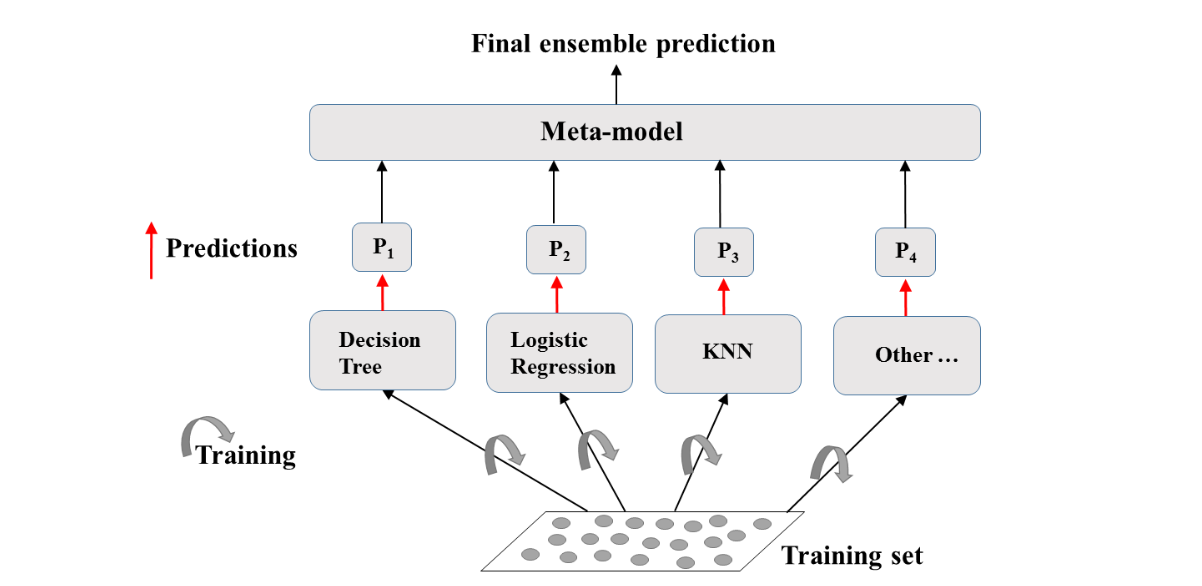
  
- **Voting classifer**
  > 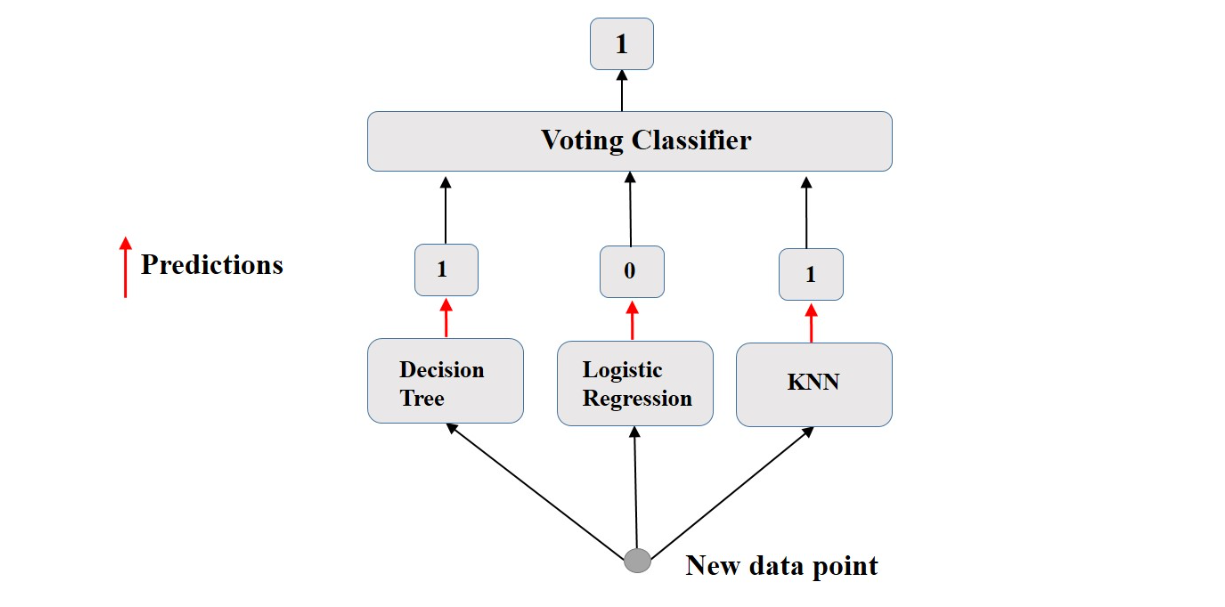
  *Example of binary voting classifer*

**breast_cancer dataset**

In [39]:
X = breast.drop('diagnosis', axis = 1).to_numpy()

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

seed = 123 

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                   random_state = seed)

# instantiate individual classifier
lr = LogisticRegression(random_state = seed)
knn = KNN()
dt = DecisionTreeClassifier(random_state = seed)

# define a list called classifier that contains the tuples(classifier_name: classifer)
classifiers = [('Ligistic regression', lr),
             ('KNearst neighbours', knn),
             ('Classification Tree', dt)]

# iterate over the defined list of tuples containning classifiers
for clf_name, clf in classifier:
    # fit clf to the training set
    clf.fit(X_train, y_train)
    
    # predict the labesl of the test set
    y_pred = clf.predict(X_test)
    
    # evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Ligistic regression : 0.409
KNearst neighbours : 0.760
Classification Tree : 0.936


In [49]:
# instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators = classifiers)

# fit 'vc' to the training set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

# evaluate the test_set accuracy of 'vc'
print('Voting Classifer: {:3f}'.format(accuracy_score(y_test, y_pred)))

Voting Classifer: 0.912281


## 3. Bagging and Random Forests
- Bagging: boostrap aggregation
- Out of Bag Evaluation: OOB-evaluation
- Random Forest Evaluation: RF-evaluation

### 3.1 Bagging: bootstrap aggregation 
<br>

*Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data.*

- It is training on the subsets of the traning set
- Reduce variance of indivial models in the ensemble
- Classification
  - aggregates predictions by majority voting
  - **BaggingClassifer** in scikit-learn
- Regression
  - aggregates predictions through averaging
  - **BaggingRegressor** in scikit-learn
>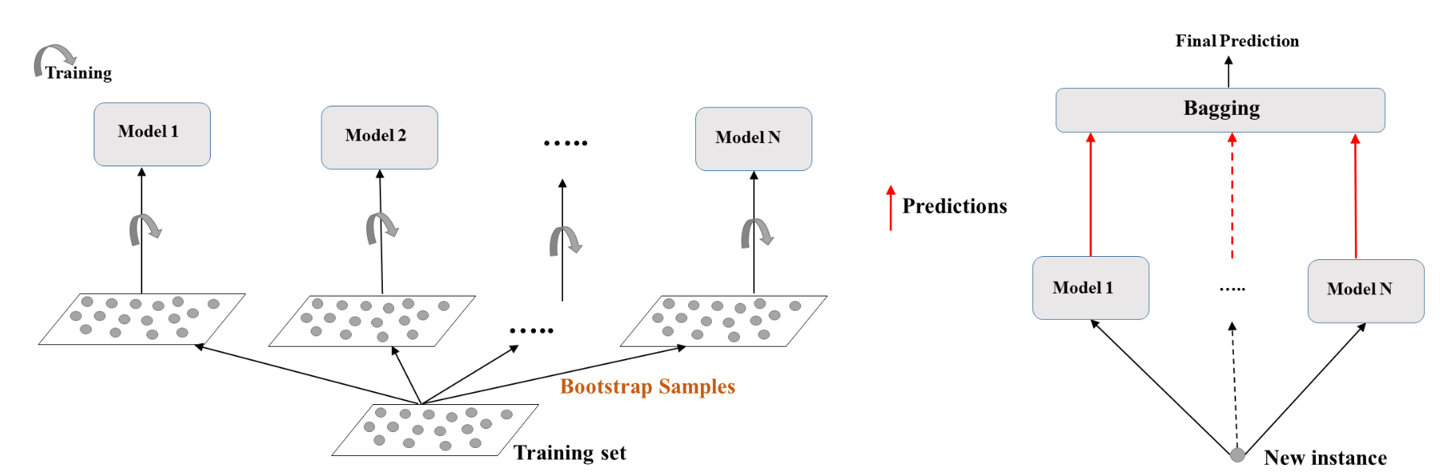

In [125]:
X = breast.drop('diagnosis', axis = 1).to_numpy()
y = breast['diagnosis']

from sklearn.ensemble import BaggingClassifier

seed = 123 

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,
                                                   test_size = 0.3,
                                                    random_state = seed)

dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 0.16, random_state = seed)

# instantiate a BaggingClassifer 'bc'
# contains 300 decision trees
bc = BaggingClassifier(base_estimator = dt, n_estimators = 300, n_jobs = -1)

bc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

# evaluae 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging classifier: {:3f}'.format(accuracy))

Accuracy of Bagging classifier: 0.947368


### 3.2 Out of Bag(OOB) Evaluation on various models
- OOB: the remaining % unsampled training instances
- OOB can be used to evaluate the model without cross_val_score
- OOB score is the mean of these N OOB scores
> 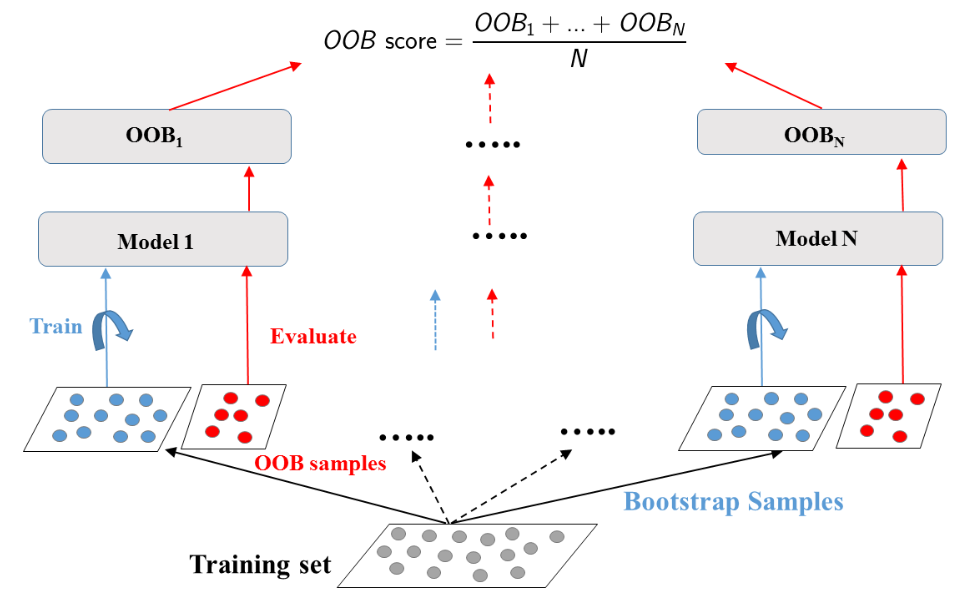

In [55]:
seed = 123 

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                    stratify = y,
                                                    random_state = seed)

dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 0.16, random_state = seed)

# OOB score responds to accuracy for classifers and r-squared of regresion
bc = BaggingClassifier(base_estimator = dt, n_estimators = 300, 
                       oob_score = True,
                       n_jobs = -1)

bc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

# evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
# extract the OOB accuracy from 'bc'
obb_accuracy = bc.oob_score_

# print test set accuracy and OBB score
print('Test set accuracy: {:3f}'.format(test_accuracy))
print('OBB accuracy:{:3f}'.format(obb_accuracy))

# OBB accuray is very close to the test set accuray which indicates: 
# OBB-evaluation can be an efficient technique to obtain a performace estimate
# of a bagged-ensemble on unseen data without performing cross_val_score

Test set accuracy: 0.947368
OBB accuracy:0.914573


### 3.3 Random Forests(RF)
- Another ensemble method: only uses **Desicion tree** as a basic estimator
- Tree-based methods: enable measuring the importance of each feature in prediction
 - In **sklearn**: it is measured by how much the tree nodes use a particular feature(weighted average) to reduce impurity
  - accessed using the attribute **feature_importance_**
- Each estimator is trained on a different bootsrap sample having the same size as the training set
- RF introduces furhter randomization in the training of individual tree
- RF achieves lower variance than individual trees
- d features are sampled at each node without replacement (d < total number of features)
 - The node is split using the sampled features that maximizes IG
 - defaut d: np.sqrt(number of features)
> 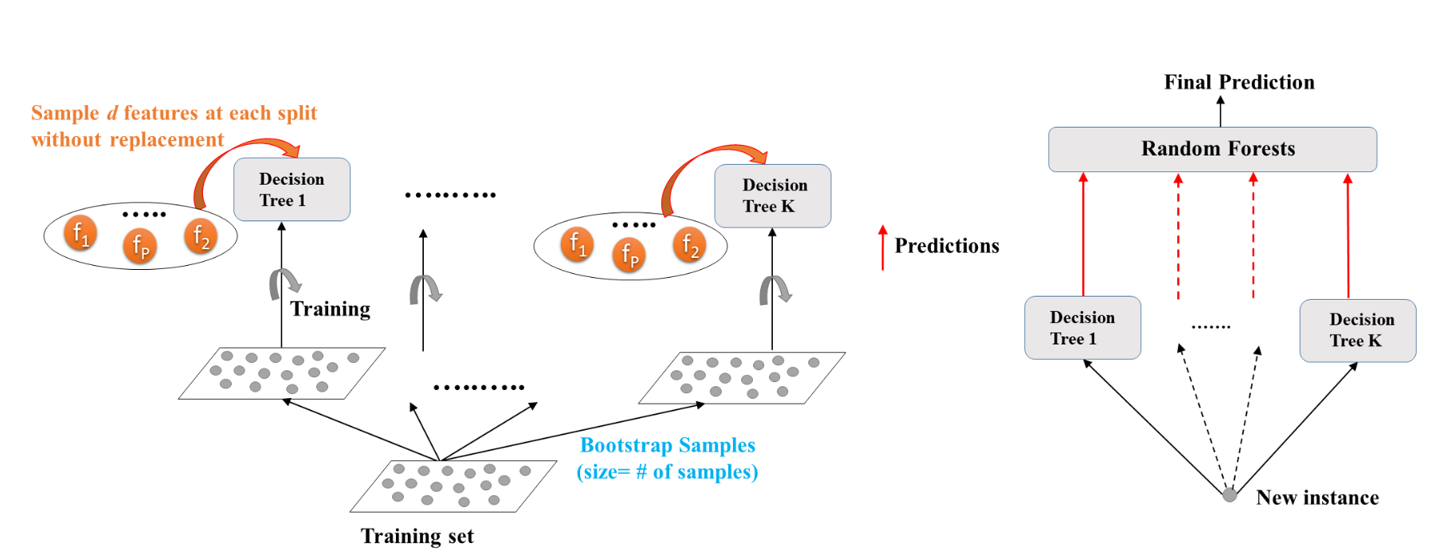
- Classificaiton 
  - aggregates predictions by majority voting
  - **RandomForestClassifer** in scikit-learn
- Regression
  - aggregates predictions through averaging
  - **RandomForestRegressor** in scikit-learn

**mpg_auto dataset**

In [57]:
mpg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [100]:
mpg['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [148]:
mpg = mpg[mpg['horsepower']!='?']
mpg['horsepower'].astype(str).astype(int)
mpg.to_csv('/QXJ/kaggle/data/mpg_revised.csv')

In [111]:
X = mpg.drop(['mpg','car name'], axis=1)
y = mpg['mpg']

In [112]:
from sklearn.ensemble import RandomForestRegressor

seed = 123 

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                    random_state = seed)

# instantiate a random forests regressor 'rf' 400 estimators(regression trees)
rf = RandomForestRegressor(n_estimators = 400, 
                          min_samples_leaf = 0.12,
                          random_state = seed)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# evaluate test set RMSE
rmse = MSE(y_test, y_pred)**1/2
print('Test set RMSR of rf:{:2f}'.format(rmse))

Test set RMSR of rf:8.232277


**Feature importance in scikit-learning**

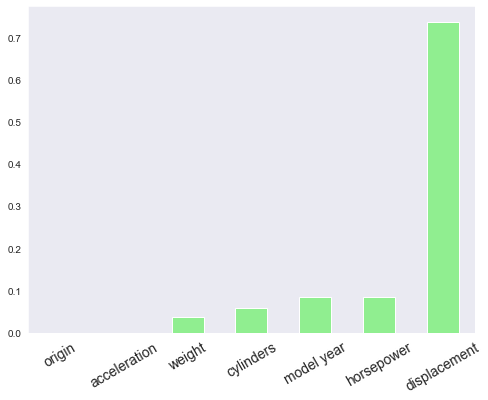

In [118]:
# create a pd.Series of feature importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# make a horizontal bar plot
plt.figure(figsize = (8,6))
sorted_importances_rf.plot(kind = 'bar', color = 'lightgreen')

plt.xticks(fontsize = 14, rotation = 30)
plt.show()

## 4. Boosting
<br>

*Boosting refers to an ensemble method in which several models are trained sequentially with each model learning from the errors of its predecessors.*
- AdaBoost
- GradientBoostingRegressor
- Stochastic Gradient Boosting (SGB)

### 4.1 Adaboost
- **Boosting**: 
  - Ensemble method combining several week leaners to form a strong learner
      - Weaker learner: model doing slightly better than the random guess, such as decision stump which depth is 1
  - Train on ensemble of predictors sequentially
  - Each predictor tries to correct its predecessor
- Boosting methods: 
  - AdaBoost
  - Gradient Boosting
- **Adaboost**: Adaptive Boosting
 - each predictor pays more attetention to the instances wrongly predicted by its predecessor 
 - achieved by changing the weights of training instances
 - each predictor is assigned a coefficient alpha α
  - alpha depends on the predictor's training error
  - important metric: learning rate **eta**
  > 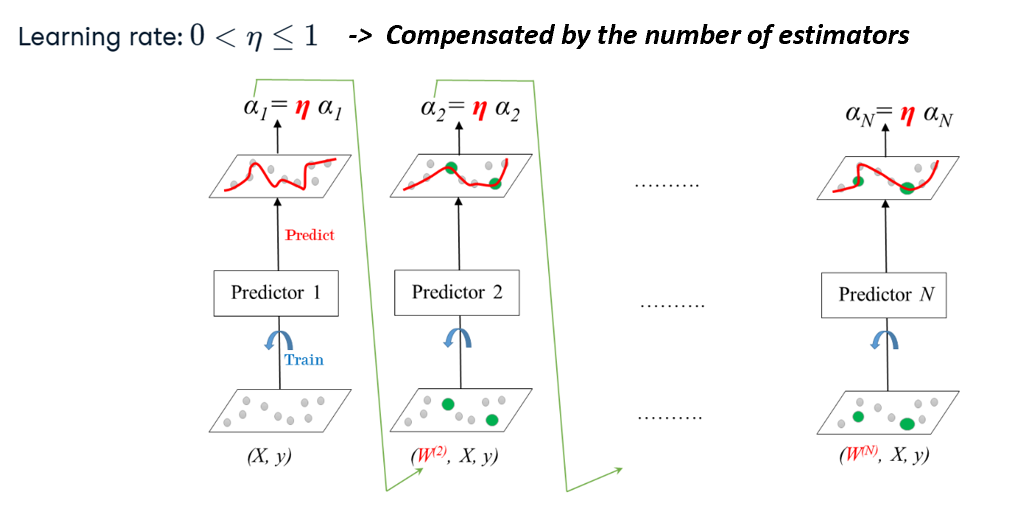
- Classificaiton 
  - Weighted majority voting
  - **AdaBoostClassifer** in scikit-learn
- Regression
  - Weighted average -> **individual predictor need not to be CARTs**
  - **AdaBoostRegressor** in scikit-learn

**breast cancer dataset**

In [137]:
breast.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [138]:
X = breast[['concave points_mean','radius_mean']].to_numpy()
y = breast['diagnosis']

In [142]:
y.shape

(569,)

In [145]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

seed = 123 

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                    random_state = seed)

dt = DecisionTreeClassifier(max_depth = 1, random_state = seed)
# instantiate an adaBoost classifier 'adb_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)

# fit adb_clf
adb_clf.fit(X_train, y_train)


# predict the test set probabilities of positive class
y_pred_prob = adb_clf.predict_proba(X_test)[:,1]

# evaluate test_set roc_auc_score
adb_clf_auc_score = roc_auc_score(y_test,y_pred_prob)

print('ROC AUC score: {:2f}'.format(adb_clf_auc_score))

ROC AUC score: 0.949386


### 4.2 Gradient Boosting(GB): exhausive procedures
- Search for best split points and features, may leading to use the sample spit pointing and maybe the same features
- Each predictor in the ensemble corrects its predecessor's error: sequential correction
- Does not tweak the weights of training instances
- Each predictor is trained using its predecessor's residual errors a label
- **Gradiant Boosted Trees**: a CART used as base learner
  - important metric: shrinkage
  - when a new instance is available, each tree predicts a label and the fianl ensemble prediction is given as **regression formular**
  >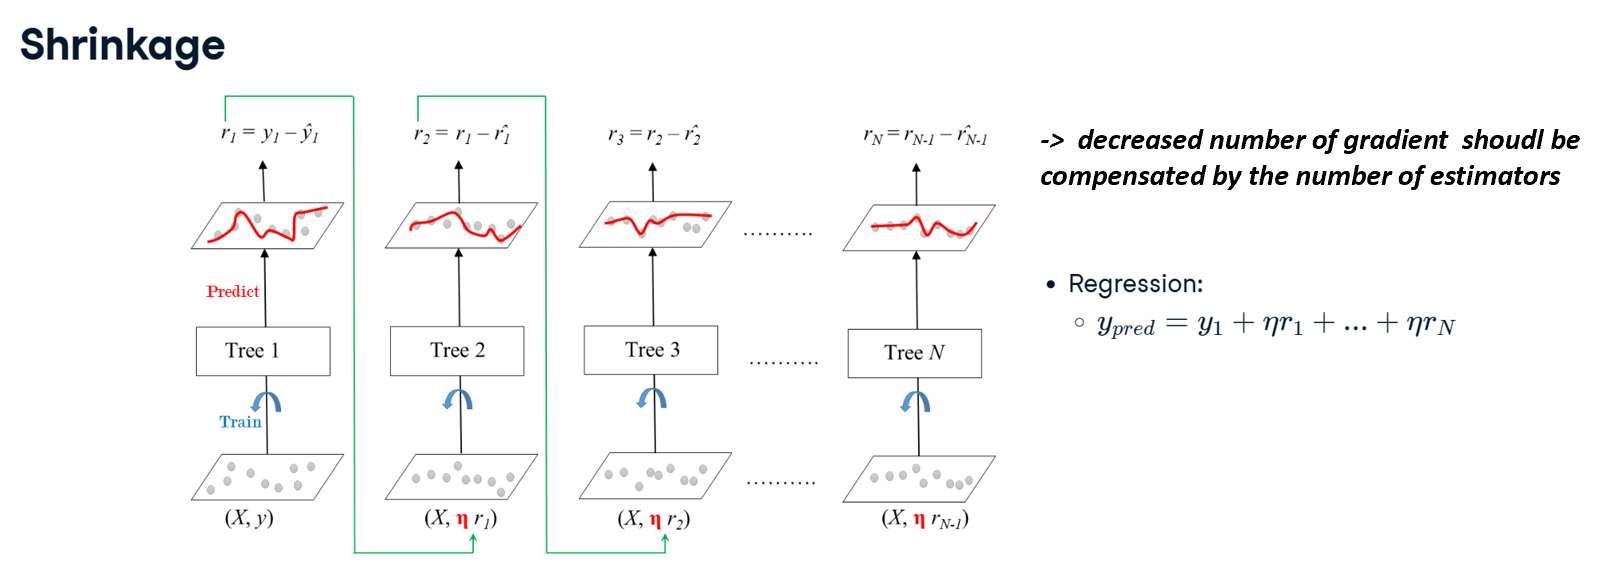
- Classificaiton 
  - **GradientBoostingClassifer** in scikit-learn
- Regression
  - y_pred regression formular
  - **GradientboostingRegressor** in scikit-learn

**mpg auto dataset**

In [150]:
X = mpg.drop(['mpg','car name'], axis=1).to_numpy()
y = mpg['mpg']

In [152]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

seed = 123 

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                    random_state = seed)

# instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators = 300, 
                                max_depth = 1, 
                                random_state = seed)

# fit gbt
gbt.fit(X_train, y_train)
# predict
y_pred = gbt.predict(X_test)
# evaluate
rmse_test = MSE(y_test, y_pred) **1/2

print('Test set RMSE: {:2f}'.format(rmse_test))

Test set RMSE: 4.974558


### 4.3 Stochastic Gradient Boosting (SGB)
- To mitigate the exhausive effect of GB
- Each tree is trained on a random subset of rows of the training data
- The sampled instances (40% - 80%) of the training data are sampled without replacemetn
- Features are sampled (without replacement) when choosing split points
- **Result**: futher ensemble diversity
- **Effect**: adding further variance to the ensemble of trees
>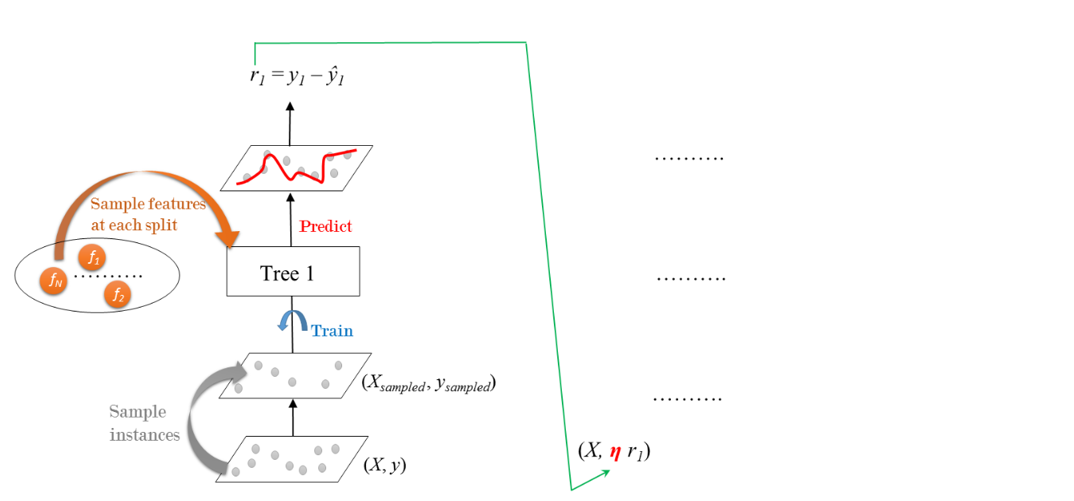

In [154]:
seed = 123 

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                    random_state = seed)

# instantiate a stochasitc GradientBoostingRegressor 'sgbt'
# subsample: each tree samples 80% of the training data
# max_features: each tree uses 20% of available features to perform best split
sgbt = GradientBoostingRegressor(max_depth = 1,
                                 subsample = 0.8,
                                 max_features = 0.3,
                                 n_estimators = 300, 
                                random_state = seed)

# fit gbt
sgbt.fit(X_train, y_train)
# predict
y_pred = sgbt.predict(X_test)
# evaluate
rmse_test = MSE(y_test, y_pred) **1/2

print('Test set RMSE: {:2f}'.format(rmse_test))

Test set RMSE: 4.871747


## 5. Model Tuning
- Tuning a CART's Hyperparameters
- Tuning a RF's Hyperparameters

### 5.1 Tuning a CART's Hyperparameters
- Parameters are learned from training and hyperparameters are set prior to the training 
- **Problem**: search for a set of optimal of hyperparameters for a learning algorithm
- **Solution**: find a set of optimal of hyperparameters result in an optimal model. -> yields **optimal score**
- **Score**: accuracy (classification) and R-squared (regression)
- A model's generalization performance is evaluated using **cross_val_score**
- Methods: 
  - GridSearchCV
  - RandomSearchCV
  - Bayesian Optimization
  - Genetic Algorithms
 ...
- **GridSearchCV**: 
  - manually set a grid of discrete hyperparameter values
  - set a metric for scoring model performance
  - search exhausitively through the grid 
  - for each set of hyperparameters, evaluate each model's CV score
  - **The curse of dimensionality**: the bigger the grid, the longer it takes to find the solution

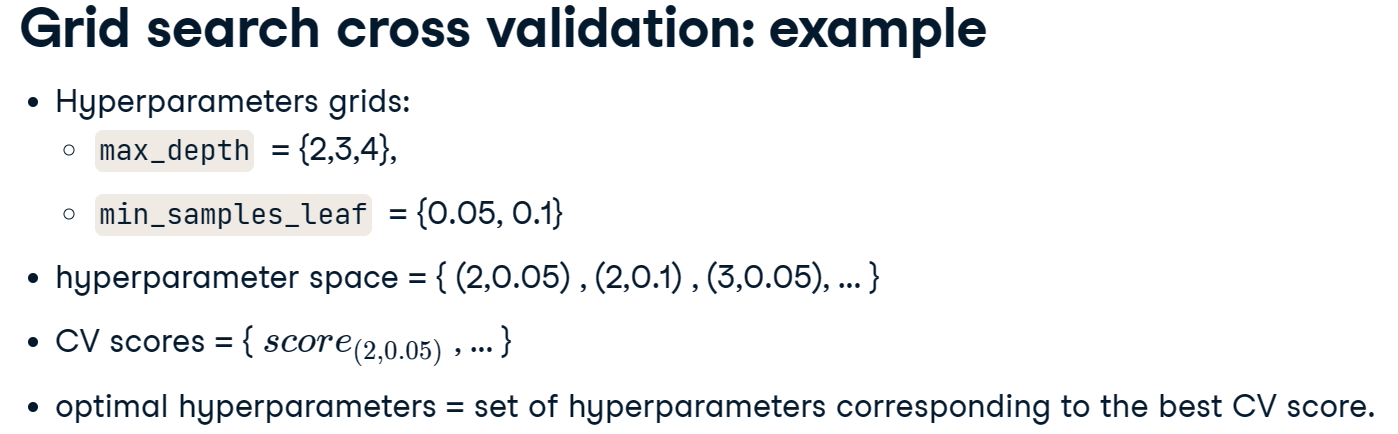

In [165]:
breast.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [166]:
X = breast.drop(['id','diagnosis'], axis = 1).to_numpy()
y = breast['diagnosis']

In [167]:
seed = 1

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                    random_state = seed)

dt = DecisionTreeClassifier(random_state = seed)
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


**Tuning a CART's Hyperparameters**

In [168]:
from sklearn.model_selection import GridSearchCV

# define the grid of hyperparameters 'params_dt'
params_dt = {'max_depth': [3,4 ,5 ,6], 
             'max_features': [0.2, 0.4, 0.6, 0.8], 
             'min_samples_leaf': [0.04, 0.06, 0.08]
    }

# instantiate 1 10-fold CV GridSearchCV object as 'grid_dt'
# refit parameter is default True 
grid_dt = GridSearchCV(estimator = dt, 
                      param_grid = params_dt,
                      scoring = 'accuracy',
                      cv = 10, 
                      n_jobs = -1)

grid_dt.fit(X_train, y_train)

# extract best hyperparameters from grid_dt
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters : \n', best_hyperparams)

Best hyperparameters : 
 {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.04}


In [170]:
# extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy:', best_CV_score)

Best CV accuracy: 0.9373076923076923


In [171]:
# extract best model evaluated based on the whole training set
best_model = grid_dt.best_estimator_
best_model

DecisionTreeClassifier(max_depth=3, max_features=0.2, min_samples_leaf=0.04,
                       random_state=1)

In [172]:
# evaluate test set accuracy
test_acc = best_model.score(X_test, y_test)
print('Test set  accuracy of best model: {:3f}'.format(test_acc))

Test set  accuracy of best model: 0.888889


### 5.2 Tuning a RF's Hyperparameters
- The hyperparameters of ensemble itself include 
  - number of estimators
  - if bootstrap 
  ......
- Need to weight the impact of turning on the whole project

**Inspecting RF hyperparameters in sklearn**

In [173]:
seed = 1

rf = RandomForestRegressor(random_state = seed)

# inspect rf's hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [174]:
X = mpg.drop(['mpg','car name'], axis=1).to_numpy()
y = mpg['mpg']

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                    random_state = seed)

In [177]:
params_rf = {
    'n_estimators': [300, 400, 500],
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [0.1, 0.2],
    'max_features': ['log2', 'sqrt']
}

# higher verbosity, the more megs are print during fitting
grid_dt = GridSearchCV(estimator = rf, 
                      param_grid = params_rf,
                      scoring = 'neg_mean_squared_error',
                      cv = 3, 
                      verbose = 1,
                      n_jobs = -1)

grid_dt.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [178]:
# extract best hyperparameters from grid_dt
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters : \n', best_hyperparams)

Best hyperparameters : 
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 500}


In [180]:
# extract best model evaluated based on the whole training set
best_model = grid_dt.best_estimator_
best_model

RandomForestRegressor(max_depth=4, max_features='log2', min_samples_leaf=0.1,
                      n_estimators=500, random_state=1)

In [183]:
y_pred = best_model.predict(X_test)
# evaluate test set accuracy
rmse_acc = MSE(y_test, y_pred) ** 1/2
print('Test set  RMSE of rf: {:3f}'.format(rmse_acc))

Test set  RMSE of rf: 8.371041
